In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import datetime as dt

In [2]:
pd.options.display.max_columns = 500

In [3]:
meters = gpd.read_file("C:/Users/CSS/Desktop/MUSA611/final-project/ParkingMeters.geojson")

In [4]:
neighborhood = gpd.read_file("C:/Users/CSS/Desktop/MUSA611/final-project/AnalysisNeighborhoods.geojson")

In [5]:
parkings = pd.read_csv("C:/Users/CSS/Desktop/MUSA611/final-project/SFMTA_Parking_Meter_Detailed_Revenue_Trageojnsactions0327_0402.csv")

In [6]:
parkings.columns

Index(['TRANSMISSION_DATETIME', 'POST_ID', 'STREET_BLOCK', 'PAYMENT_TYPE',
       'SESSION_START_DT', 'SESSION_END_DT', 'METER_EVENT_TYPE',
       'GROSS_PAID_AMT'],
      dtype='object')

In [7]:
len(parkings)

428166

In [8]:
join_meters = gpd.sjoin(meters, neighborhood, op='within')
meter_index = join_meters[['post_id', 'nhood']]
meter_index = meter_index.merge(neighborhood, left_on='nhood', right_on='nhood')
meter_index.head()

,post_id,nhood,geometry
0,500-08020,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
1,720-06360,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
2,500-07150,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
3,350-07180,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
4,520-05190,Chinatown,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."


In [9]:
parking_nhood = parkings[['TRANSMISSION_DATETIME', 'POST_ID', 'STREET_BLOCK', 'PAYMENT_TYPE',
       'SESSION_START_DT', 'SESSION_END_DT']].merge(meter_index, left_on='POST_ID', right_on='post_id')

In [10]:
parking_nhood['SESSION_START_DT'].unique()

array(['2022/03/27 12:49:42 AM', '2022/03/28 11:03:00 AM',
       '2022/03/28 11:03:34 AM', ..., '2022/04/02 05:40:34 PM',
       '2022/04/02 05:49:43 PM', '2022/04/02 07:27:39 PM'], dtype=object)

In [11]:
parking_nhood.head()

,TRANSMISSION_DATETIME,POST_ID,STREET_BLOCK,PAYMENT_TYPE,SESSION_START_DT,SESSION_END_DT,post_id,nhood,geometry
0,226542839_4_03272022004942,463-01480,HAWTHORNE ST 100,CASH,2022/03/27 12:49:42 AM,2022/03/27 12:49:42 AM,463-01480,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."
1,226559225_4_03282022110300,463-01480,HAWTHORNE ST 100,CASH,2022/03/28 11:03:00 AM,2022/03/28 11:49:40 AM,463-01480,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."
2,226559224_4_03282022110334,463-01480,HAWTHORNE ST 100,CASH,2022/03/28 11:03:34 AM,2022/03/28 12:03:34 PM,463-01480,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."
3,226559233_4_03282022110347,463-01480,HAWTHORNE ST 100,CASH,2022/03/28 11:03:47 AM,2022/03/28 12:03:47 PM,463-01480,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."
4,226877240_4_04022022165954,463-01480,HAWTHORNE ST 100,CREDIT CARD,2022/04/02 04:59:54 PM,2022/04/02 05:19:54 PM,463-01480,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."


In [12]:
parking_nhood['SESSION_START_DT'] = parking_nhood['SESSION_START_DT'].apply(lambda x: dt.datetime.strptime(x, "%Y/%m/%d %I:%M:%S %p"))

In [13]:
parking_nhood.dtypes

TRANSMISSION_DATETIME            object
POST_ID                          object
STREET_BLOCK                     object
PAYMENT_TYPE                     object
SESSION_START_DT         datetime64[ns]
SESSION_END_DT                   object
post_id                          object
nhood                            object
geometry                       geometry
dtype: object

In [14]:
parking_nhood['date'] = parking_nhood['SESSION_START_DT'].apply(lambda x: x.strftime("%d"))

In [15]:
parking_nhood['date'].unique()

array(['27', '28', '02', '29', '30', '31', '01'], dtype=object)

In [16]:
parking_nhood['hour'] = parking_nhood['SESSION_START_DT'].apply(lambda x: x.hour)

In [17]:
parking_nhood['hour'].unique()

array([ 0, 11, 16,  1, 12, 17, 13, 10, 15,  9, 14,  5,  8, 18,  6, 19, 20,
        7,  4, 21, 22, 23,  2,  3], dtype=int64)

7-10 am rush
11-16 daytime
17-21 pm rush
22-6 night

In [18]:
def timePeriod(hour):
    if (hour >= 7 & hour <= 10):
        return 'am rush'
    elif (hour >= 11 & hour <= 16):
        return 'day time'
    elif (hour >= 17 & hour <= 21):
        return 'pm rush'
    else:
        return 'night time'

In [19]:
parking_nhood.loc[3, 'hour']

11

In [20]:
parking_nhood['time_period'] = parking_nhood.apply(lambda x: timePeriod(x['hour']), axis=1)

In [21]:
parking_nhood.time_period.unique()

array(['am rush'], dtype=object)

In [23]:
parking_nhood.head(2)

,TRANSMISSION_DATETIME,POST_ID,STREET_BLOCK,PAYMENT_TYPE,SESSION_START_DT,SESSION_END_DT,post_id,nhood,geometry,date,hour,time_period
0,226542839_4_03272022004942,463-01480,HAWTHORNE ST 100,CASH,2022-03-27 00:49:42,2022/03/27 12:49:42 AM,463-01480,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875...",27,0,am rush
1,226559225_4_03282022110300,463-01480,HAWTHORNE ST 100,CASH,2022-03-28 11:03:00,2022/03/28 11:49:40 AM,463-01480,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875...",28,11,am rush


In [26]:
# parking_nhood['date'].astype(int)
parking_nhood['date'].unique()

array(['27', '28', '02', '29', '30', '31', '01'], dtype=object)

In [30]:
def dateIndex(date):
    if (date == '27'):
        return 0
    elif (date == '28'):
        return 1
    elif (date == '29'):
        return 2
    if (date == '30'):
        return 3
    elif (date == '31'):
        return 4
    elif (date == '01'):
        return 5
    else:
        return 6

In [31]:
parking_nhood['dateIndex'] = parking_nhood.apply(lambda x: dateIndex(x['date']), axis=1)

In [32]:
parking_nhood['dateIndex'] 

0         0
1         1
2         1
3         1
4         6
         ..
424890    6
424891    6
424892    6
424893    6
424894    6
Name: dateIndex, Length: 424895, dtype: int64

In [61]:
def dateIndex2(date):
    if (date == '27'):
        return 1000
    elif (date == '28'):
        return 1001
    elif (date == '29'):
        return 1002
    if (date == '30'):
        return 1003
    elif (date == '31'):
        return 1004
    elif (date == '01'):
        return 1005
    else:
        return 1006

In [79]:
parking_nhood['dateIndex2'] = parking_nhood.apply(lambda x: dateIndex2(x['date']), axis=1)
parking_nhood['dateIndex2'] = parking_nhood['dateIndex2'].astype(str)
parking_nhood['dateIndex2'] 

0         1000
1         1001
2         1001
3         1001
4         1006
          ... 
424890    1006
424891    1006
424892    1006
424893    1006
424894    1006
Name: dateIndex2, Length: 424895, dtype: object

## Group by date

In [80]:
count_by_date = parking_nhood.groupby(['nhood', 'dateIndex2']).count().reset_index()

In [81]:
count_by_date = count_by_date[['nhood', 'dateIndex2', 'post_id']].rename(columns={'post_id': 'count_parking_date'}).sort_values(['dateIndex2'])
count_by_date

,nhood,dateIndex2,count_parking_date
0,Bayview Hunters Point,1000,1
227,West of Twin Peaks,1000,15
54,Haight Ashbury,1000,9
220,Visitacion Valley,1000,2
61,Hayes Valley,1000,3
...,...,...,...
67,Hayes Valley,1006,1841
142,North Beach,1006,3426
60,Haight Ashbury,1006,1260
177,Portola,1006,859


In [82]:
pivot_record_date = count_by_date.pivot(index="nhood", columns=["dateIndex2"],values="count_parking_date")
pivot_record_date = pivot_record_date.reset_index().fillna(0)
pivot_record_date

dateIndex2,nhood,1000,1001,1002,1003,1004,1005,1006
0,Bayview Hunters Point,1.0,33.0,47.0,55.0,56.0,40.0,51.0
1,Bernal Heights,6.0,1208.0,1196.0,1176.0,1183.0,1207.0,1185.0
2,Castro/Upper Market,5.0,1071.0,1099.0,1211.0,1199.0,1214.0,1209.0
3,Chinatown,7.0,2429.0,2525.0,2281.0,2539.0,2485.0,2415.0
4,Excelsior,15.0,1042.0,974.0,1021.0,1052.0,999.0,1066.0
5,Financial District/South Beach,720.0,5486.0,6051.0,6124.0,6214.0,5879.0,6783.0
6,Glen Park,0.0,261.0,270.0,264.0,313.0,268.0,279.0
7,Golden Gate Park,0.0,22.0,23.0,37.0,34.0,31.0,43.0
8,Haight Ashbury,9.0,1255.0,1213.0,1229.0,1281.0,1272.0,1260.0
9,Hayes Valley,3.0,1686.0,1721.0,1752.0,1769.0,1861.0,1841.0


In [83]:
pivot_record_date.columns

Index(['nhood', '1000', '1001', '1002', '1003', '1004', '1005', '1006'], dtype='object', name='dateIndex2')

## Group by date and hour

In [84]:
parking_nhood['hourIndex'] = parking_nhood['dateIndex']*24 + parking_nhood['hour']
parking_nhood['hourIndex'] = parking_nhood['hourIndex'].astype(str)
parking_nhood['hourIndex']

0           0
1          35
2          35
3          35
4         160
         ... 
424890    161
424891    161
424892    161
424893    161
424894    163
Name: hourIndex, Length: 424895, dtype: object

In [85]:
count_by_hour = parking_nhood.groupby(['nhood', 'hourIndex']).count().reset_index()

In [86]:
count_by_hour = count_by_hour[['nhood', 'hourIndex', 'post_id']].rename(columns={'post_id': 'count_parking_hour'}).sort_values(['hourIndex'])
count_by_hour

,nhood,hourIndex,count_parking_hour
401,Financial District/South Beach,0,1
2154,Portola,1,3
56,Bernal Heights,10,1
989,Japantown,10,1
402,Financial District/South Beach,10,66
...,...,...,...
1824,North Beach,94,1
533,Financial District/South Beach,94,12
2647,South of Market,94,2
2831,Tenderloin,94,2


In [143]:
# count_by_day['hour'] = count_by_day['hour'].astype(str)

In [87]:
pivot_record_hour = count_by_hour.pivot(index="nhood", columns=["hourIndex"],values="count_parking_hour")
pivot_record_hour = pivot_record_hour.reset_index().fillna(0)
pivot_record_hour

hourIndex,nhood,0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,17,18,19,20,21,22,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,5,51,52,53,54,55,56,57,58,59,6,60,61,62,63,64,65,66,67,68,69,7,70,71,72,74,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95
0,Bayview Hunters Point,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,5.0,8.0,12.0,6.0,3.0,0.0,7.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,4.0,5.0,6.0,5.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0,10.0,10.0,9.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,3.0,2.0,5.0,5.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,7.0,0.0,9.0,7.0,3.0,5.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,6.0,12.0,6.0,6.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bernal Heights,0.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0,121.0,131.0,138.0,134.0,142.0,0.0,134.0,124.0,132.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,116.0,0.0,113.0,146.0,140.0,151.0,127.0,124.0,154.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,80.0,126.0,166.0,147.0,134.0,145.0,124.0,0.0,129.0,119.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0,121.0,119.0,153.0,137.0,135.0,130.0,142.0,138.0,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,108.0,137.0,162.0,0.0,134.0,136.0,129.0,129.0,124.0,117.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,17.0,103.0,133.0,137.0,149.0,129.0,116.0,116.0,152.0,120.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,Castro/Upper Market,0.0,0.0,1.0,0.0,1.0,0.0,4.0,24.0,107.0,121.0,144.0,145.0,130.0,2.0,140.0,130.0,147.0,100.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,5.0,32.0,140.0,0.0,109.0,143.0,126.0,129.0,148.0,138.0,130.0,104.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,24.0,145.0,139.0,137.0,119.0,129.0,129.0,130.0,0.0,159.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,31.0,97.0,103.0,120.0,143.0,104.0,147.0,123.0,126.0,71.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,22.0,97.0,111.0,120.0,0.0,134.0,117.0,113.0,148.0,121.0,108.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,0.0,42.0,127.0,108.0,144.0,136.0,122.0,135.0,137.0,151.0,95.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0
3,Chinatown,0.0,0.0,0.0,1.0,5.0,9.0,101.0,163.0,266.0,231.0,274.0,264.0,225.0,1.0,284.0,226.0,259.0,225.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,21.0,100.0,134.0,248.0,2.0,253.0,264.0,273.0,234.0,257.0,256.0,252.0,187.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,43.0,93.0,215.0,239.0,242.0,270.0,256.0,237.0,273.0,0.0,291.0,246.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,78.0,127.0,244.0,261.0,269.0,233.0,259.0,254.0,257.0,246.0,177.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,18.0,70.0,134.0,292.0,298.0,279.0,0.0,253.0,256.0,248.0,252.0,213.0,209.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,7.0,106.0,2.0,126.0,218.0,220.0,237.0,253.0,243.0,244.0,182.0,230.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Excelsior,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,97.0,125.0,116.0,131.0,120.0,1.0,131.0,132.0,116.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,87.0,2.0,129.0,119.0,122.0,106.0,124.0,117.0,98.0,87.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,12.0,85.0,150.0,142.0,130.0,136.0,124.0,110.0,2.0,99.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,92.0,103.0,120.0,118.0,131.0,100.0,117.0,147.0,94.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,83.0,112.0,121.0,0.0,128.0,103.0,107.0,108.0,117.0,84.0,1.0,0

In [51]:
#pivot_record.columns

In [146]:
#pivot_record.columns = pivot_record.columns.map('-'.join).str.strip('-')

In [88]:
pivot_record = pivot_record_hour.merge(pivot_record_date, left_on='nhood', right_on='nhood')
pivot_record

,nhood,0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,17,18,19,20,21,22,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,5,51,52,53,54,55,56,57,58,59,6,60,61,62,63,64,65,66,67,68,69,7,70,71,72,74,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,1000,1001,1002,1003,1004,1005,1006
0,Bayview Hunters Point,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,5.0,8.0,12.0,6.0,3.0,0.0,7.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,4.0,5.0,6.0,5.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0,10.0,10.0,9.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,3.0,2.0,5.0,5.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,7.0,0.0,9.0,7.0,3.0,5.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,6.0,12.0,6.0,6.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,47.0,55.0,56.0,40.0,51.0
1,Bernal Heights,0.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0,121.0,131.0,138.0,134.0,142.0,0.0,134.0,124.0,132.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,116.0,0.0,113.0,146.0,140.0,151.0,127.0,124.0,154.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,80.0,126.0,166.0,147.0,134.0,145.0,124.0,0.0,129.0,119.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0,121.0,119.0,153.0,137.0,135.0,130.0,142.0,138.0,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,108.0,137.0,162.0,0.0,134.0,136.0,129.0,129.0,124.0,117.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,17.0,103.0,133.0,137.0,149.0,129.0,116.0,116.0,152.0,120.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,1208.0,1196.0,1176.0,1183.0,1207.0,1185.0
2,Castro/Upper Market,0.0,0.0,1.0,0.0,1.0,0.0,4.0,24.0,107.0,121.0,144.0,145.0,130.0,2.0,140.0,130.0,147.0,100.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,5.0,32.0,140.0,0.0,109.0,143.0,126.0,129.0,148.0,138.0,130.0,104.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,24.0,145.0,139.0,137.0,119.0,129.0,129.0,130.0,0.0,159.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,31.0,97.0,103.0,120.0,143.0,104.0,147.0,123.0,126.0,71.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,22.0,97.0,111.0,120.0,0.0,134.0,117.0,113.0,148.0,121.0,108.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,0.0,42.0,127.0,108.0,144.0,136.0,122.0,135.0,137.0,151.0,95.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,5.0,1071.0,1099.0,1211.0,1199.0,1214.0,1209.0
3,Chinatown,0.0,0.0,0.0,1.0,5.0,9.0,101.0,163.0,266.0,231.0,274.0,264.0,225.0,1.0,284.0,226.0,259.0,225.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,21.0,100.0,134.0,248.0,2.0,253.0,264.0,273.0,234.0,257.0,256.0,252.0,187.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,43.0,93.0,215.0,239.0,242.0,270.0,256.0,237.0,273.0,0.0,291.0,246.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,78.0,127.0,244.0,261.0,269.0,233.0,259.0,254.0,257.0,246.0,177.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,18.0,70.0,134.0,292.0,298.0,279.0,0.0,253.0,256.0,248.0,252.0,213.0,209.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,7.0,106.0,2.0,126.0,218.0,220.0,237.0,253.0,243.0,244.0,182.0,230.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2429.0,2525.0,2281.0,2539.0,2485.0,2415.0
4,Excelsior,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,97.0,125.0,116.0,131.0,120.0,1.0,131.0,132.0,116.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,87.0,2.0,129.0,119.0,122.0,106.0,124.0,117.0,98.0,87.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,12.0,85.0,150.0,142.0,130.0,136.0,124.0,110.0,2.0,99.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [89]:
parking_geom = pivot_record.merge(neighborhood, left_on='nhood', right_on='nhood')
parking_geom

,nhood,0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,17,18,19,20,21,22,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,5,51,52,53,54,55,56,57,58,59,6,60,61,62,63,64,65,66,67,68,69,7,70,71,72,74,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,1000,1001,1002,1003,1004,1005,1006,geometry
0,Bayview Hunters Point,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,5.0,8.0,12.0,6.0,3.0,0.0,7.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,4.0,5.0,6.0,5.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0,10.0,10.0,9.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,3.0,2.0,5.0,5.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,7.0,0.0,9.0,7.0,3.0,5.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,6.0,12.0,6.0,6.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,47.0,55.0,56.0,40.0,51.0,"MULTIPOLYGON (((-122.38158 37.75307, -122.3815..."
1,Bernal Heights,0.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0,121.0,131.0,138.0,134.0,142.0,0.0,134.0,124.0,132.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,116.0,0.0,113.0,146.0,140.0,151.0,127.0,124.0,154.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,80.0,126.0,166.0,147.0,134.0,145.0,124.0,0.0,129.0,119.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0,121.0,119.0,153.0,137.0,135.0,130.0,142.0,138.0,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,108.0,137.0,162.0,0.0,134.0,136.0,129.0,129.0,124.0,117.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,17.0,103.0,133.0,137.0,149.0,129.0,116.0,116.0,152.0,120.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,1208.0,1196.0,1176.0,1183.0,1207.0,1185.0,"MULTIPOLYGON (((-122.40361 37.74934, -122.4037..."
2,Castro/Upper Market,0.0,0.0,1.0,0.0,1.0,0.0,4.0,24.0,107.0,121.0,144.0,145.0,130.0,2.0,140.0,130.0,147.0,100.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,5.0,32.0,140.0,0.0,109.0,143.0,126.0,129.0,148.0,138.0,130.0,104.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,24.0,145.0,139.0,137.0,119.0,129.0,129.0,130.0,0.0,159.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,31.0,97.0,103.0,120.0,143.0,104.0,147.0,123.0,126.0,71.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,22.0,97.0,111.0,120.0,0.0,134.0,117.0,113.0,148.0,121.0,108.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,0.0,42.0,127.0,108.0,144.0,136.0,122.0,135.0,137.0,151.0,95.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,5.0,1071.0,1099.0,1211.0,1199.0,1214.0,1209.0,"MULTIPOLYGON (((-122.42656 37.76948, -122.4269..."
3,Chinatown,0.0,0.0,0.0,1.0,5.0,9.0,101.0,163.0,266.0,231.0,274.0,264.0,225.0,1.0,284.0,226.0,259.0,225.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,21.0,100.0,134.0,248.0,2.0,253.0,264.0,273.0,234.0,257.0,256.0,252.0,187.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,43.0,93.0,215.0,239.0,242.0,270.0,256.0,237.0,273.0,0.0,291.0,246.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,78.0,127.0,244.0,261.0,269.0,233.0,259.0,254.0,257.0,246.0,177.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,18.0,70.0,134.0,292.0,298.0,279.0,0.0,253.0,256.0,248.0,252.0,213.0,209.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,7.0,106.0,2.0,126.0,218.0,220.0,237.0,253.0,243.0,244.0,182.0,230.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2429.0,2525.0,2281.0,2539.0,2485.0,2415.0,"MULTIPOLYGON (((-122.40623 37.79756, -122.4055..."
4,Excelsior,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,97.0,125.0,116.0,131.0,120.0,1.0,131.0,132.0,116.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,87.0,2.0,1

In [90]:
parking_geom = gpd.GeoDataFrame(parking_geom, geometry=parking_geom.geometry)

<AxesSubplot:>

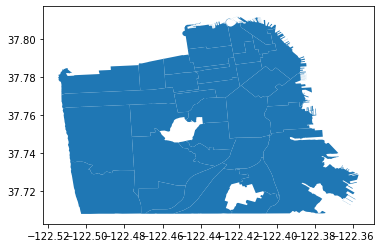

In [91]:
parking_geom.plot()

In [1]:
# parking_geom.to_json()

In [94]:
parking_geom.to_file("C:/Users/CSS/Desktop/MUSA611/final-project/parking_0327_0402_new.geojson", driver="GeoJSON")

## Visualizations

<AxesSubplot:>

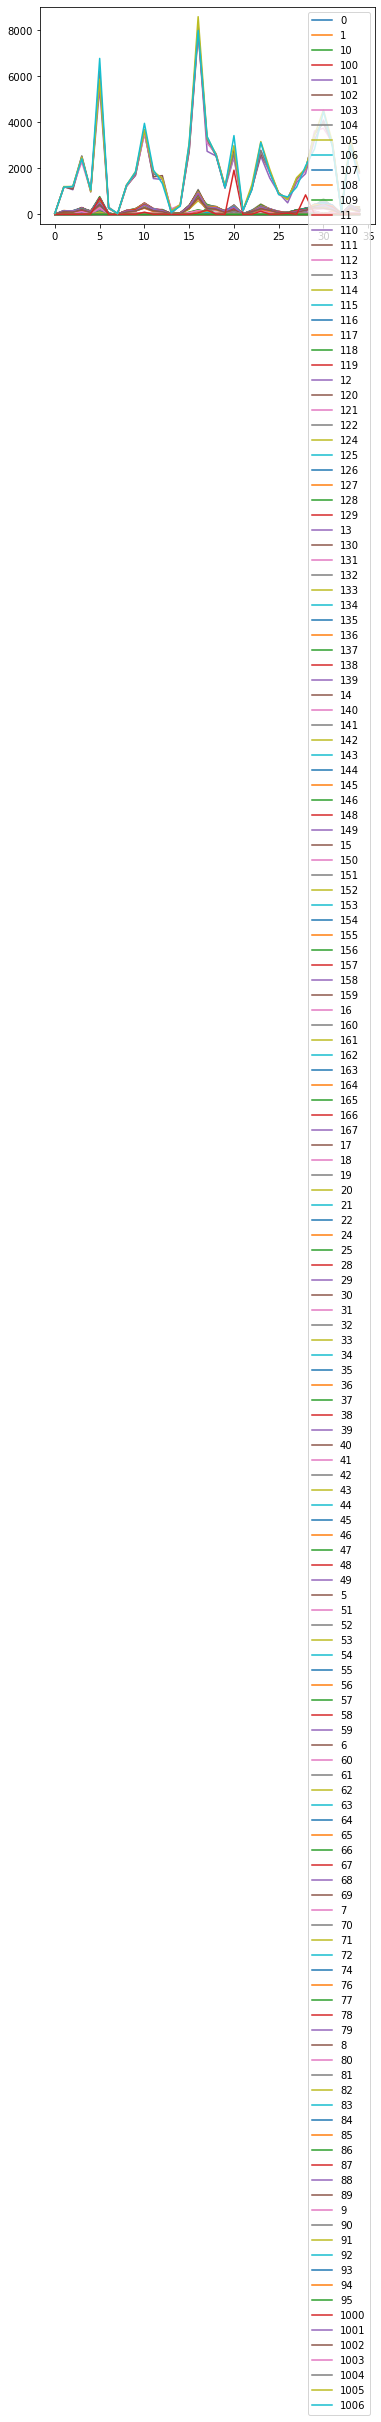

In [95]:
pivot_record.plot()

In [96]:
col = pivot_record.columns
col.values

array(['nhood', '0', '1', '10', '100', '101', '102', '103', '104', '105',
       '106', '107', '108', '109', '11', '110', '111', '112', '113',
       '114', '115', '116', '117', '118', '119', '12', '120', '121',
       '122', '124', '125', '126', '127', '128', '129', '13', '130',
       '131', '132', '133', '134', '135', '136', '137', '138', '139',
       '14', '140', '141', '142', '143', '144', '145', '146', '148',
       '149', '15', '150', '151', '152', '153', '154', '155', '156',
       '157', '158', '159', '16', '160', '161', '162', '163', '164',
       '165', '166', '167', '17', '18', '19', '20', '21', '22', '24',
       '25', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '5', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69',
       '7', '70', '71', '72', '74', '76', '77', '78', '79', '8', '80',
       '81'

<AxesSubplot:>

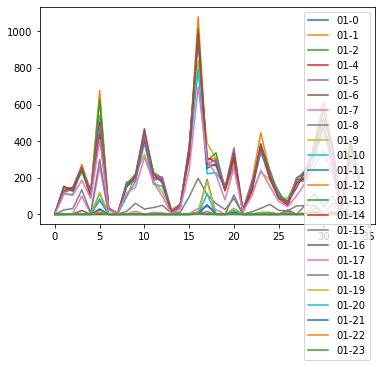

In [155]:
pivot_record[['01-0', '01-1', '01-2', '01-4', '01-5', '01-6', '01-7',
       '01-8', '01-9', '01-10', '01-11', '01-12', '01-13', '01-14',
       '01-15', '01-16', '01-17', '01-18', '01-19', '01-20', '01-21',
       '01-22', '01-23']].plot()

## New attempt

In [103]:
pivot_record.head()

,nhood,0,1,10,100,101,102,103,104,105,106,107,108,109,11,110,111,112,113,114,115,116,117,118,119,12,120,121,122,124,125,126,127,128,129,13,130,131,132,133,134,135,136,137,138,139,14,140,141,142,143,144,145,146,148,149,15,150,151,152,153,154,155,156,157,158,159,16,160,161,162,163,164,165,166,167,17,18,19,20,21,22,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,5,51,52,53,54,55,56,57,58,59,6,60,61,62,63,64,65,66,67,68,69,7,70,71,72,74,76,77,78,79,8,80,81,82,83,84,85,86,87,88,89,9,90,91,92,93,94,95,1000,1001,1002,1003,1004,1005,1006
0,Bayview Hunters Point,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,5.0,8.0,12.0,6.0,3.0,0.0,7.0,4.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,4.0,5.0,6.0,5.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0,10.0,10.0,9.0,0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,3.0,2.0,5.0,5.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,7.0,0.0,9.0,7.0,3.0,5.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,7.0,6.0,12.0,6.0,6.0,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33.0,47.0,55.0,56.0,40.0,51.0
1,Bernal Heights,0.0,0.0,1.0,0.0,0.0,0.0,1.0,22.0,121.0,131.0,138.0,134.0,142.0,0.0,134.0,124.0,132.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0,116.0,0.0,113.0,146.0,140.0,151.0,127.0,124.0,154.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,80.0,126.0,166.0,147.0,134.0,145.0,124.0,0.0,129.0,119.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,22.0,121.0,119.0,153.0,137.0,135.0,130.0,142.0,138.0,108.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,108.0,137.0,162.0,0.0,134.0,136.0,129.0,129.0,124.0,117.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,17.0,103.0,133.0,137.0,149.0,129.0,116.0,116.0,152.0,120.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,1208.0,1196.0,1176.0,1183.0,1207.0,1185.0
2,Castro/Upper Market,0.0,0.0,1.0,0.0,1.0,0.0,4.0,24.0,107.0,121.0,144.0,145.0,130.0,2.0,140.0,130.0,147.0,100.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,5.0,32.0,140.0,0.0,109.0,143.0,126.0,129.0,148.0,138.0,130.0,104.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,24.0,145.0,139.0,137.0,119.0,129.0,129.0,130.0,0.0,159.0,93.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,31.0,97.0,103.0,120.0,143.0,104.0,147.0,123.0,126.0,71.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,22.0,97.0,111.0,120.0,0.0,134.0,117.0,113.0,148.0,121.0,108.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,0.0,42.0,127.0,108.0,144.0,136.0,122.0,135.0,137.0,151.0,95.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,5.0,1071.0,1099.0,1211.0,1199.0,1214.0,1209.0
3,Chinatown,0.0,0.0,0.0,1.0,5.0,9.0,101.0,163.0,266.0,231.0,274.0,264.0,225.0,1.0,284.0,226.0,259.0,225.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,21.0,100.0,134.0,248.0,2.0,253.0,264.0,273.0,234.0,257.0,256.0,252.0,187.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,43.0,93.0,215.0,239.0,242.0,270.0,256.0,237.0,273.0,0.0,291.0,246.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,78.0,127.0,244.0,261.0,269.0,233.0,259.0,254.0,257.0,246.0,177.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,18.0,70.0,134.0,292.0,298.0,279.0,0.0,253.0,256.0,248.0,252.0,213.0,209.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,7.0,106.0,2.0,126.0,218.0,220.0,237.0,253.0,243.0,244.0,182.0,230.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2429.0,2525.0,2281.0,2539.0,2485.0,2415.0
4,Excelsior,0.0,0.0,2.0,0.0,0.0,0.0,2.0,4.0,97.0,125.0,116.0,131.0,120.0,1.0,131.0,132.0,116.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,87.0,2.0,129.0,119.0,122.0,106.0,124.0,117.0,98.0,87.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,12.0,85.0,150.0,142.0,130.0,136.0,124.0,110.0,2.0,99.0,75.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [112]:
list(pivot_record.columns)

['nhood',
 '0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '24',
 '25',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '74',
 '76',
 '77'

In [113]:
long_df = pivot_record.melt(id_vars=['nhood'], value_vars=['0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '24',
 '25',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '74',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '1000',
 '1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '1006'],
                 var_name='timeIndex', value_name='value')
long_df

,nhood,timeIndex,value
0,Bayview Hunters Point,0,0.0
1,Bernal Heights,0,0.0
2,Castro/Upper Market,0,0.0
3,Chinatown,0,0.0
4,Excelsior,0,0.0
...,...,...,...
5595,Sunset/Parkside,1006,4483.0
5596,Tenderloin,1006,2944.0
5597,Visitacion Valley,1006,116.0
5598,West of Twin Peaks,1006,3012.0


In [115]:
long_df['timeIndex'] = long_df['timeIndex'].astype(int)

In [116]:
long_df.dtypes

nhood         object
timeIndex      int32
value        float64
dtype: object

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

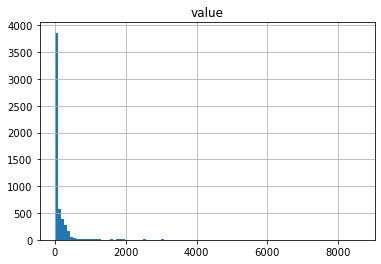

In [126]:
long_df[['nhood', 'value']].hist(bins=100)

In [127]:
long_df['value'].max()

8598.0

In [117]:
new_parking_geom = long_df.merge(neighborhood, left_on='nhood', right_on='nhood')
new_parking_geom

,nhood,timeIndex,value,geometry
0,Bayview Hunters Point,0,0.0,"MULTIPOLYGON (((-122.38158 37.75307, -122.3815..."
1,Bayview Hunters Point,1,0.0,"MULTIPOLYGON (((-122.38158 37.75307, -122.3815..."
2,Bayview Hunters Point,10,0.0,"MULTIPOLYGON (((-122.38158 37.75307, -122.3815..."
3,Bayview Hunters Point,100,0.0,"MULTIPOLYGON (((-122.38158 37.75307, -122.3815..."
4,Bayview Hunters Point,101,0.0,"MULTIPOLYGON (((-122.38158 37.75307, -122.3815..."
...,...,...,...,...
5595,Western Addition,1002,1850.0,"MULTIPOLYGON (((-122.42144 37.78557, -122.4213..."
5596,Western Addition,1003,1811.0,"MULTIPOLYGON (((-122.42144 37.78557, -122.4213..."
5597,Western Addition,1004,1861.0,"MULTIPOLYGON (((-122.42144 37.78557, -122.4213..."
5598,Western Addition,1005,1897.0,"MULTIPOLYGON (((-122.42144 37.78557, -122.4213..."


In [118]:
new_parking_geom = gpd.GeoDataFrame(new_parking_geom, geometry=new_parking_geom.geometry)

<AxesSubplot:>

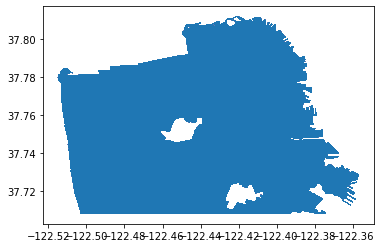

In [119]:
new_parking_geom.plot()

In [2]:
#new_parking_geom.to_json()

In [121]:
new_parking_geom.to_file("C:/Users/CSS/Desktop/MUSA611/final-project/parking_0327_0402_new_new.geojson", driver="GeoJSON")